    ## Week 2 : Linear Regression
```
- Machine Learning, Innopolis University (Fall semester 2022)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>


```
Lab Plan
1. Linear Regression
2. Multiple Linear Regression
3. Polynomial Regression
3.1 Overfitting & underfitting
```

<hr>



![](https://www.alpharithms.com/wp-content/uploads/1156/slope-intercept-vs-linear-regression-equations.jpg)



## Typical ML model Training Procedure

1. Define the Task (Supervised or unsupervised Learning, Classification or Regression)  
1. Import necessary libraries
1. Load and Explore the dataset (visualization) 
1. Preprocess the Data & split to train/test  (feature selection, scaling, normalization, etc..)
1. Build, Train and Test Model
1. Evaluate model using appropiate evaluation metrics (MSE, $R^2$, accuracy, f-score, precision, recall, etc.. )

## 1. Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
<br>
<br>
<center><b>Simple Linear Regression</b></center>
$$y = \beta_0 + \beta_1x_1 $$

### 1.2 Import necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 1.3 Load and Explore the dataset

In [2]:
student_scores_df = pd.read_csv('student_scores.csv')
student_scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 1.3.1 Data Statistics

In [3]:
student_scores_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 1.3.1 Visualization

Plot the data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data points. Usually Matplotlib is used but some other libraries exist i.e [Plotly](https://github.com/plotly/plotly.py), [Seaborn](https://seaborn.pydata.org/),[Geoplotlib](https://github.com/andrea-cuttone/geoplotlib/wiki/User-Guide), [Gleam](https://github.com/dgrtwo/gleam), [ggplot](https://github.com/tidyverse/ggplot2)

**Remember :** Plot should have a title, axis labels, and legend for easy interpretation

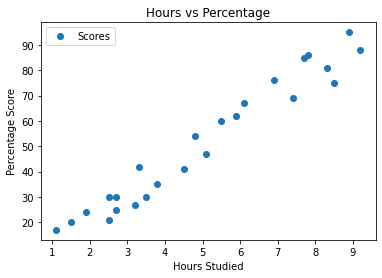

In [4]:
student_scores_df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### 1.4 Preprocess the Data & split to train set and test set

<span style="color:red">Task : split the data into tarin (80%) and test (20%)</span>

In [5]:
X = student_scores_df.iloc[:, :-1].values
y = student_scores_df.iloc[:, 1].values

X_train, X_test, y_train, y_test = None

### 1.5 Build, Train and Test ModelLinear Regression Model

In [6]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficient : {regressor.coef_}")

y_pred = regressor.predict(X_test)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

Model intercept : 4.0473769216964754
Model coefficient : [9.46461686]


In [7]:
eval_df

,Actual,Predicted
0,60,56.102770
1,24,22.030149
2,85,76.924927
3,21,27.708919
4,27,34.334151


### 1.5 Evaluate model using appropiate evaluation metrics

In [8]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.597044924328524
Mean Squared Error: 36.614978008383886
Root Mean Squared Error: 6.0510311524883


## 2. Multiple Linear Regression

Linear regression involving multiple variables is called "multiple linear regression"
We will use multiple linear regression to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license.
We seek a model of the form:

$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n.$$

### 2.3  Load and Explore the dataset

In [9]:
petrol_consumption_df = pd.read_csv('petrol_consumption.csv')
petrol_consumption_df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [10]:
petrol_consumption_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


### 2.4 Preprocess the Data & split to train set and test set

In [11]:
X = petrol_consumption_df.drop('Petrol_Consumption', axis=1)
y = petrol_consumption_df['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


### 2.5 Build, Train and Test Model Regression Model

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")

Model intercept : 425.59933220324206
Model coefficients : [-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03]


### 2.6 Evaluate model using appropiate evaluation metrics

<span style="color:red">Task 1 : Use the predict function in the model(`regressor`) to predict the output of the testset(`X_test`) and  print it. </span>

<span style="color:red">Task  2 : Measure the performance of the model using: <br>     </span>
1. root mean squared error 
1. mean absolute error 
1. coefficient of determination $R^2$. See [`sklearn.metrics.r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) for $R^2$.

In [13]:
# TODO: Task 1

In [14]:
# TODO: Task 2

## 3. Polynomial Regression, Underfitting & Overfitting

Polynomial Regression, is simply a transformation for the explanatory variables to higher polynomial orders with interactive variables.

1. Why do we need it?
1. Which order of the polynomial should we choose? 
2. should we always pick the most complex model? 



### 3.2 Import libraries

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #to convert the original features into their higher order terms 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

### 3.3 Load and Explore the dataset
<span style="color:red">Task : generate synthetic dataset by adding some random gaussian noise to a cosine function.</span>

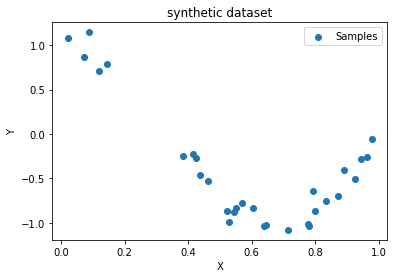

In [16]:
# sinusoidal function
def fn(X):
    #Task : one line of code
    return None

np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = fn(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X,y,label="Samples")
plt.title('synthetic dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc="best")
plt.show()

### 3.4 Preprocess the Data, build model and evaluate model 

* We will build three polynomial models with degrees [1, 4, 15] and observe the effect of increasing the degree of complixity of the model on how well it suits the data.
* We will evaluate our model using cross validation

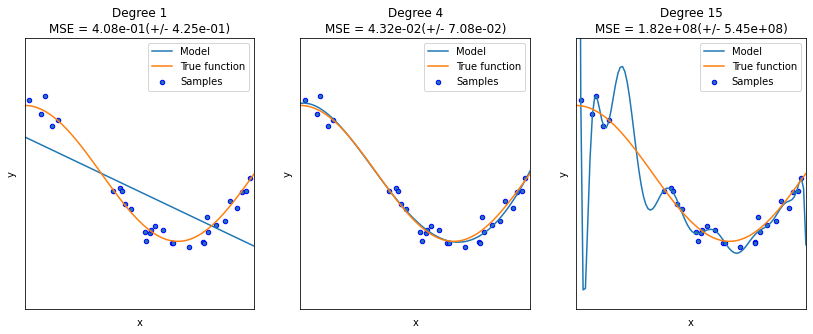

In [17]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, sinusoidal(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## <center>Self practice</center>

* Using boston house-prices dataset from sklearn ([sklearn.datasets.fetch_california_housing](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html)).
    1. Split the data to train and test set (80% training). Use [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    1. Train a multiple linear regression model that will predict the house price `(target)`.
    1. Print the model `Mean Absolute Error`, `Mean Squared Error` and `Root Mean Squared Error`


* Select one indipendent and select `target` as dependent variable 
    1. Visualise the data (using `matplotlib`)
    1. Create a Polynomial Regression model using `[1,5,24]` as degrees
    1. Explain your observations in terms of Over-fitting, Under-fitting, Bias-Variance trade-offs.

In [42]:
import pandas as pd
from scipy.stats import zscore
import numpy as np

In [43]:
from sklearn.datasets import fetch_california_housing

df, target = fetch_california_housing(return_X_y=True)
df, target = pd.DataFrame(df), pd.DataFrame(target)

In [44]:
print('With outliers:', df.shape)
df.mask(abs(df[df.columns[df.dtypes != object]].apply(zscore)) > 3, inplace=True)
df = pd.concat([df,target],axis=1)
df.dropna(inplace=True)
target = df.iloc[:,-1]
df = df.iloc[:,:-1]
print('Without outliers:', df.shape)

With outliers: (20640, 8)
Without outliers: (19794, 8)


In [45]:
from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df)

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, = train_test_split(df, target, test_size=0.2)

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [48]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(x_train,y_train)
y_pred = linear.predict(x_test)
y_pred_train = linear.predict(x_train)
print("MSE on testset:", mean_squared_error(y_test, y_pred))
print('MAE on testset:', mean_absolute_error(y_test, y_pred))
print('RMSE score on testset:', math.sqrt(mean_squared_error(y_test, y_pred)))

print('\nMSE on trainset:', mean_squared_error(y_train, y_pred_train))
print('MAE on trainset:', mean_absolute_error(y_train, y_pred_train))
print('RMSE score on trainset:', math.sqrt(mean_squared_error(y_train,y_pred_train)))

MSE on testset: 0.4576566748999778
MAE on testset: 0.4898742356124205
RMSE score on testset: 0.6765032704281464

MSE on trainset: 0.4519676003639158
MAE on trainset: 0.4902057115140081
RMSE score on trainset: 0.672285356350944


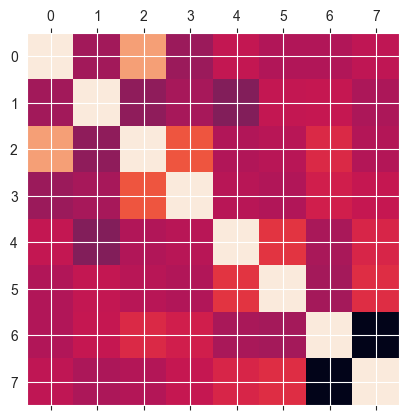

In [49]:
from matplotlib.pyplot import *
matshow(pd.DataFrame(df).corr())
show()

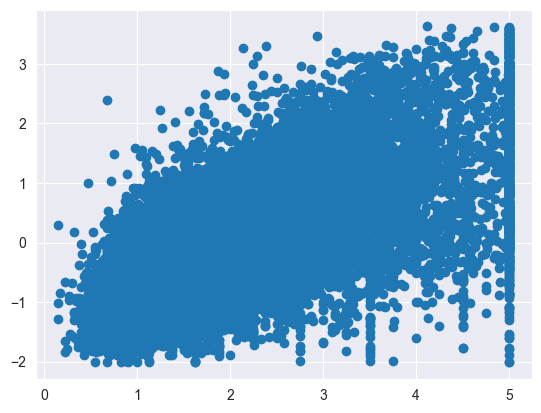

In [50]:
scatter(target, df[:,0])

In [51]:
x_train = np.array(x_train,dtype=np.float32)
y_train = np.array(y_train,dtype=np.float32)
x_test = np.array(x_test,dtype=np.float32)
y_test = np.array(y_test,dtype=np.float32)

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
for i in [1,5,6,7,8]:
    poly = PolynomialFeatures(degree=i)
    line = LinearRegression()
    pipeline = Pipeline([('poly',poly),('line',line)])
    pipeline.fit(x_train,y_train)
    y_pred_train = pipeline.predict(x_train)
    y_pred = pipeline.predict(x_test)
    print('\n', i, 'degree')
    print('\nMSE on trainset:', mean_squared_error(y_train, y_pred_train))
    print('MAE on trainset:', mean_absolute_error(y_train, y_pred_train))
    print('RMSE score on trainset:', math.sqrt(mean_squared_error(y_train,y_pred_train)))
    print("MSE on testset:", mean_squared_error(y_test, y_pred))
    print('MAE on testset:', mean_absolute_error(y_test, y_pred))
    print('RMSE score on testset:', math.sqrt(mean_squared_error(y_test, y_pred)))


 1 degree

MSE on trainset: 0.45196763
MAE on trainset: 0.49020573
RMSE score on trainset: 0.6722853760197925
MSE on testset: 0.45765668
MAE on testset: 0.48987424
RMSE score on testset: 0.6765032753339988

 5 degree

MSE on trainset: 0.3521766
MAE on trainset: 0.40640628
RMSE score on trainset: 0.5934446955320444
MSE on testset: 64.69521
MAE on testset: 0.6507699
RMSE score on testset: 8.043333470512776

 6 degree

MSE on trainset: 0.84097505
MAE on trainset: 0.60576147
RMSE score on trainset: 0.9170469160069386
MSE on testset: 1504.6766
MAE on testset: 1.5807543
RMSE score on testset: 38.790161584378424

 7 degree

MSE on trainset: 1.7197205
MAE on trainset: 0.8707575
RMSE score on trainset: 1.311381135607125
MSE on testset: 197.05937
MAE on testset: 1.2308023
RMSE score on testset: 14.037783726366573

 8 degree

MSE on trainset: 1.207666
MAE on trainset: 0.8675971
RMSE score on trainset: 1.0989385967681988
MSE on testset: 5.544821
MAE on testset: 0.9255545
RMSE score on testset: 2.

We can see here that 1 degree polynom has not enough complexity to solve this task. Model is underfitted. Thats why metrics on test is quite similar to metrix on train. So it needs more complexity. Same with 5 degree polynom. But on 6 degree and further we can see that metrics begin to be more and more distinguished and error on test set started to rise. That means that model now have enough complexity and it start to learn on noise. Model is now overfitted.